In [1]:
from torch import empty
import math
import random
from framework import *
torch.set_grad_enabled(False)

In [2]:
#function to generate the data
def generate_disc_set(nb):
    input_ = torch.empty(nb, 2).uniform_(0, 1)
    target = (input_-0.5).pow(2).sum(1).sub(1 / (math.pi*2)).sign().add(1).div(2).long()
    target= 1 -target
    target = 2*target -1 
    return input_, target

In [3]:
def training(train_data, train_target, net, optimizer, epochs, batch_size, permute = False):
    N=train_data.shape[0]
    losses_log = []
    for e in range(epochs):
        acc_loss=0
        if permute:
            indices = list(range(len(tensor)))
            random.shuffle(indices)
            train_data_shuffled = train_data[indices]
            train_target_shuffled = train_target[indices]
        else:
            train_data_shuffled = train_data
            train_target_shuffled = train_target

        for b in range(0, N, batch_size):
            predictions = net.forward(train_data_shuffled[b:b+batch_size])
            l= loss.forward(predictions, train_target_shuffled[b:b+batch_size].unsqueeze(-1))
            acc_loss += l
            optimizer.zero_grad()

            net.backward(loss.backward())

            new_par = optimizer.step()
            net.set_parameters(new_par)

        print(e, '   MSE loss = ' , acc_loss.item()) 
        losses_log += [acc_loss.item()]
    return torch.tensor(losses_log)

In [4]:
def training_sigm(train_data, train_target, net, optimizer, epochs, batch_size, permute = False):
    N=train_data.shape[0]
    losses_log = []
    for e in range(epochs):
        acc_loss=0
        if permute:
            indices = list(range(len(tensor)))
            random.shuffle(indices)
            train_data_shuffled = train_data[indices]
            train_target_shuffled = train_target[indices]
        else:
            train_data_shuffled = train_data
            train_target_shuffled = train_target

        for b in range(0, N, batch_size):
            predictions = net.forward(train_data_shuffled[b:b+batch_size])
            l= loss.forward(predictions, train_target_shuffled[b:b+batch_size])
            acc_loss += l
            optimizer.zero_grad()

            net.backward(loss.backward())

            new_par = optimizer.step()
            net.set_parameters(new_par)

        print(e, '   MSE loss = ' , acc_loss.item()) 
        losses_log += [acc_loss.item()]
    return torch.tensor(losses_log)

In [5]:
#counting corrects on test
def test_tanh(net, test_data, test_target, verbose = False):
    correct_count=0
    for i in range(test_data.shape[0]):
            x=test_data[i]
            y=test_target[i]

            y_pred = net.forward(x.unsqueeze(0))

            correct = y_pred.sign()*y>0
            if verbose:
                print('prediction output \t', round(y_pred.item(), 2), '\t\treal output\t', round(y.item(), 2),'\t\tcorrect prediction?', correct.item())
            if correct : correct_count += 1

    print('Correct predictions after '+str(epochs)+' training steps: '+str(correct_count/test_data.shape[0]*100)+' %')

In [6]:
#counting corrects on test
def test_sig(net, test_data, test_target, verbose = False):
    correct_count=0
    for i in range(test_data.shape[0]):
            x=test_data[i]
            y=test_target[i]

            y_pred = net.forward(x.unsqueeze(0))

            correct = y_pred.argmax()==y.argmax()
            if verbose:
                print('prediction output \t', y_pred, y_pred.argmax(), '\t\treal output\t', y, y.argmax(),'\t\tcorrect prediction?', correct)
            if correct : correct_count += 1

    print('Correct predictions after '+str(epochs)+' training steps: '+str(correct_count/test_data.shape[0]*100)+' %')

In [7]:
def convert_to_one_hot_labels(input, target):
    tmp = input.new_zeros(target.size(0), target.max() + 1)
    tmp.scatter_(1, target.view(-1, 1), 1.0)
    return tmp

In [8]:
N_data_point = 1000
train_data, train_target= generate_disc_set(N_data_point)
test_data,  test_target = generate_disc_set(N_data_point)
#lets try not to normalize it: since it is in [0, 1]^2 this is just a traslation and a sqrt(3) resizing in both directions

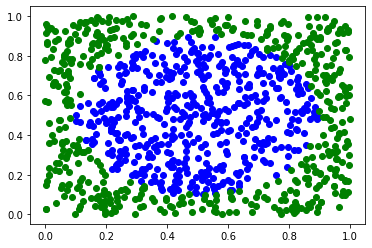

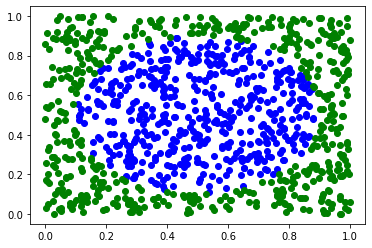

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
plt.plot(train_data[:,0][train_target==1], train_data[:,1][train_target==1],'bo')
plt.plot(train_data[:,0][train_target!=1], train_data[:,1][train_target!=1],'go')

fig = plt.figure()
plt.plot(test_data[:,0][test_target==1], test_data[:,1][test_target==1],'bo')
plt.plot(test_data[:,0][test_target!=1], test_data[:,1][test_target!=1],'go')

In [10]:
##########################################################################################################################
## Homemade sequential linear + tanh

In [11]:
linear1 = Linear(2, 25, True)
linear2 = Linear(25,25,True)
linear3 = Linear(25,25,True)
linear4 = Linear(25,1,True)
sigma1 = Tanh()
sigma2 = Tanh()
sigma3 = Tanh()
sigma4 = Tanh()

loss = MSE()

net = Sequential([
    linear1, 
    sigma1 ,
    linear2,
    sigma2 ,
    linear3,
    sigma3 ,
    linear4,
    sigma4
])

In [12]:
optimizer = SGD(lr = 2.,momentum=False, parameters = net.get_parameters())
epochs=400
batch_size = 100
losses_log = training(train_data, train_target, net, optimizer, epochs, batch_size)

0    MSE loss =  10.175789833068848
1    MSE loss =  10.043407440185547
2    MSE loss =  10.035279273986816
3    MSE loss =  10.034273147583008
4    MSE loss =  10.033441543579102
5    MSE loss =  10.03255844116211
6    MSE loss =  10.031664848327637
7    MSE loss =  10.030778884887695
8    MSE loss =  10.029900550842285
9    MSE loss =  10.029035568237305
10    MSE loss =  10.028177261352539
11    MSE loss =  10.02733039855957
12    MSE loss =  10.026490211486816
13    MSE loss =  10.025659561157227
14    MSE loss =  10.024834632873535
15    MSE loss =  10.024016380310059
16    MSE loss =  10.023204803466797
17    MSE loss =  10.022398948669434
18    MSE loss =  10.021596908569336
19    MSE loss =  10.02079963684082
20    MSE loss =  10.02000617980957
21    MSE loss =  10.019217491149902
22    MSE loss =  10.018431663513184
23    MSE loss =  10.017647743225098
24    MSE loss =  10.016866683959961
25    MSE loss =  10.016087532043457
26    MSE loss =  10.015310287475586
27    MSE loss 

231    MSE loss =  5.66605281829834
232    MSE loss =  5.600931644439697
233    MSE loss =  5.562374114990234
234    MSE loss =  5.559763431549072
235    MSE loss =  5.581809043884277
236    MSE loss =  5.6037774085998535
237    MSE loss =  5.6132988929748535
238    MSE loss =  5.610471248626709
239    MSE loss =  5.5979084968566895
240    MSE loss =  5.577861785888672
241    MSE loss =  5.552053451538086
242    MSE loss =  5.521777629852295
243    MSE loss =  5.488005638122559
244    MSE loss =  5.451456069946289
245    MSE loss =  5.412675857543945
246    MSE loss =  5.372063159942627
247    MSE loss =  5.329912185668945
248    MSE loss =  5.286435604095459
249    MSE loss =  5.241777420043945
250    MSE loss =  5.196028709411621
251    MSE loss =  5.14923620223999
252    MSE loss =  5.101416110992432
253    MSE loss =  5.052555561065674
254    MSE loss =  5.002633094787598
255    MSE loss =  4.951619625091553
256    MSE loss =  4.899491310119629
257    MSE loss =  4.846230983734131


Correct predictions after 400 training steps: 97.7 %


Text(0.5, 1.0, 'Full Tanh')

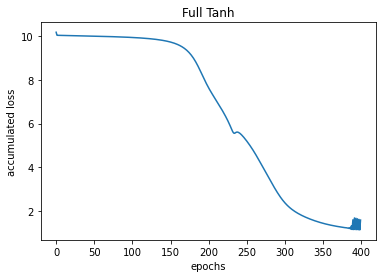

In [13]:
test_tanh(net, test_data, test_target, verbose = False)
plt.plot(torch.arange(losses_log.shape[0]), losses_log)
plt.xlabel('epochs')
plt.ylabel('accumulated loss')
plt.title('Full Tanh')

In [14]:
##########################################################################################################################
## Homemade sequential linear + relu. Tanh at the end

In [15]:
linear1 = Linear(2, 25, True)
linear2 = Linear(25,25,True)
linear3 = Linear(25,25,True)
linear4 = Linear(25,1,True)
sigma1 = ReLu()
sigma2 = ReLu()
sigma3 = ReLu()
sigma4 = Tanh()
loss = MSE()

net = Sequential([
    linear1, 
    sigma1 ,
    linear2,
    sigma2 ,
    linear3,
    sigma3 ,
    linear4,
    sigma4
])

In [16]:
optimizer = SGD(lr = 2.,momentum=False, parameters = net.get_parameters())
epochs=400
batch_size = 100
losses_log = training(train_data, train_target, net, optimizer, epochs, batch_size)

0    MSE loss =  10.04841136932373
1    MSE loss =  10.035820007324219
2    MSE loss =  10.028274536132812
3    MSE loss =  10.023574829101562
4    MSE loss =  10.019697189331055
5    MSE loss =  10.015995025634766
6    MSE loss =  10.01242446899414
7    MSE loss =  10.008991241455078
8    MSE loss =  10.005626678466797
9    MSE loss =  10.002310752868652
10    MSE loss =  9.99905014038086
11    MSE loss =  9.995757102966309
12    MSE loss =  9.992533683776855
13    MSE loss =  9.989376068115234
14    MSE loss =  9.98624038696289
15    MSE loss =  9.983097076416016
16    MSE loss =  9.979928970336914
17    MSE loss =  9.976691246032715
18    MSE loss =  9.973393440246582
19    MSE loss =  9.970050811767578
20    MSE loss =  9.966632843017578
21    MSE loss =  9.963004112243652
22    MSE loss =  9.959115982055664
23    MSE loss =  9.954992294311523
24    MSE loss =  9.95071792602539
25    MSE loss =  9.946403503417969
26    MSE loss =  9.942048072814941
27    MSE loss =  9.9376583099365

224    MSE loss =  1.0336672067642212
225    MSE loss =  1.4884145259857178
226    MSE loss =  1.0433225631713867
227    MSE loss =  1.551581859588623
228    MSE loss =  1.0579884052276611
229    MSE loss =  1.5637037754058838
230    MSE loss =  1.2907298803329468
231    MSE loss =  0.9777892231941223
232    MSE loss =  1.3746250867843628
233    MSE loss =  1.0277704000473022
234    MSE loss =  1.6724839210510254
235    MSE loss =  0.9470051527023315
236    MSE loss =  1.2668836116790771
237    MSE loss =  1.0431125164031982
238    MSE loss =  1.5717947483062744
239    MSE loss =  0.9966051578521729
240    MSE loss =  1.5155102014541626
241    MSE loss =  0.9264938831329346
242    MSE loss =  1.4183818101882935
243    MSE loss =  0.9464531540870667
244    MSE loss =  1.4700062274932861
245    MSE loss =  0.9297124743461609
246    MSE loss =  1.444411277770996
247    MSE loss =  0.8872780799865723
248    MSE loss =  1.103485345840454
249    MSE loss =  1.0254689455032349
250    MSE loss

Correct predictions after 400 training steps: 98.2 %


Text(0.5, 1.0, 'ReLu + Tanh at the end')

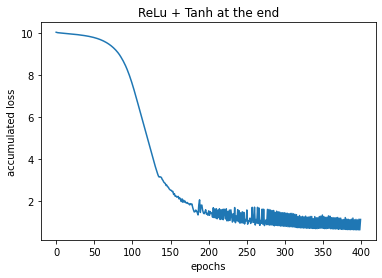

In [17]:
test_tanh(net, test_data, test_target, verbose = False)
plt.plot(torch.arange(losses_log.shape[0]), losses_log)
plt.xlabel('epochs')
plt.ylabel('accumulated loss')
plt.title('ReLu + Tanh at the end')

In [18]:
##########################################################################################################################
## Homemade sequential linear + Relu. Softmax at the end

In [19]:
#handmade sequential linear + relu with softmax with batches
linear1 = Linear(2, 25, True)
linear2 = Linear(25,25,True)
linear3 = Linear(25,25,True)
linear4 = Linear(25,2,True)
sigma1 = ReLu()
sigma2 = ReLu()
sigma3 = ReLu()
sigma4 = Softmax()
loss = MSE()

net = Sequential([
    linear1, 
    sigma1 ,
    linear2,
    sigma2 ,
    linear3,
    sigma3 ,
    linear4,
    sigma4
])


In [20]:
train_target = (train_target + 1).div(2.).to(torch.int64)
test_target = (test_target + 1).div(2.).to(torch.int64)
train_target_hot = convert_to_one_hot_labels( train_data, train_target)
test_target_hot = convert_to_one_hot_labels( test_target, test_target)

In [21]:
optimizer = SGD(lr = 1e3,momentum=False, parameters = net.get_parameters())
epochs=400
batch_size = 100
losses_log = training_sigm(train_data, train_target_hot, net, optimizer, epochs, batch_size)

0    MSE loss =  2.5150856971740723
1    MSE loss =  2.498051643371582
2    MSE loss =  2.4869816303253174
3    MSE loss =  2.4804553985595703
4    MSE loss =  2.475680351257324
5    MSE loss =  2.471510887145996
6    MSE loss =  2.4679713249206543
7    MSE loss =  2.464779853820801
8    MSE loss =  2.4615731239318848
9    MSE loss =  2.4583826065063477
10    MSE loss =  2.455528736114502
11    MSE loss =  2.4528088569641113
12    MSE loss =  2.4501123428344727
13    MSE loss =  2.447319984436035
14    MSE loss =  2.4444613456726074
15    MSE loss =  2.441570520401001
16    MSE loss =  2.4386062622070312
17    MSE loss =  2.435516357421875
18    MSE loss =  2.4323039054870605
19    MSE loss =  2.4289801120758057
20    MSE loss =  2.4255571365356445
21    MSE loss =  2.42197585105896
22    MSE loss =  2.418222427368164
23    MSE loss =  2.414335250854492
24    MSE loss =  2.4102749824523926
25    MSE loss =  2.4060511589050293
26    MSE loss =  2.4016106128692627
27    MSE loss =  2.396

224    MSE loss =  0.39898037910461426
225    MSE loss =  0.39714381098747253
226    MSE loss =  0.39543426036834717
227    MSE loss =  0.39365315437316895
228    MSE loss =  0.3924195468425751
229    MSE loss =  0.3910820782184601
230    MSE loss =  0.3897285461425781
231    MSE loss =  0.38773417472839355
232    MSE loss =  0.386447548866272
233    MSE loss =  0.3848632574081421
234    MSE loss =  0.38372281193733215
235    MSE loss =  0.3822891414165497
236    MSE loss =  0.3805742561817169
237    MSE loss =  0.380111426115036
238    MSE loss =  0.37867826223373413
239    MSE loss =  0.37700188159942627
240    MSE loss =  0.37599754333496094
241    MSE loss =  0.37520337104797363
242    MSE loss =  0.3727906048297882
243    MSE loss =  0.37231752276420593
244    MSE loss =  0.3702801764011383
245    MSE loss =  0.3690299987792969
246    MSE loss =  0.36821746826171875
247    MSE loss =  0.36623528599739075
248    MSE loss =  0.3660264313220978
249    MSE loss =  0.36383405327796936


Correct predictions after 400 training steps: 96.0 %


Text(0.5, 1.0, 'ReLu + Tanh at the end')

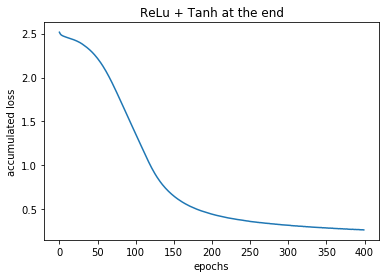

In [22]:
test_sig(net, test_data, test_target_hot, verbose = False)
plt.plot(torch.arange(losses_log.shape[0]), losses_log)
plt.xlabel('epochs')
plt.ylabel('accumulated loss')
plt.title('ReLu + Tanh at the end')

In [23]:
# not working dont know why though
def decision_boundary (point, model):
    Xspan = torch.linspace(min(point[:,0]),max(point[:,0]), 50)
    Yspan = torch.linspace(min(point[:,1]),max(point[:,1]), 50)
    grid_x, grid_y = torch.meshgrid(Xspan, Yspan)
    grid=torch.reshape(torch.cat((torch.flatten(grid_x),torch.flatten(grid_y)),0), (-1, 2))
    print(grid.size())
    pred = model.forward(grid) 
    print(pred.size()) 
    values = pred.view(grid_x.shape).detach()
    print(values.size())
    fig = plt.figure()
    plt.contourf(grid_x, grid_y,values)  # may need numpy for this


decision_boundary(test_data,net) 
plt.scatter(test_data.T[0],test_data.T[1] ,s=4,marker='o',color='red')  
#set color depending on the lebels

torch.Size([2500, 2])
torch.Size([2500, 2])


RuntimeError: shape '[50, 50]' is invalid for input of size 5000

In [ ]:
import numpy as np
x = np.ones([5, 5])
y = torch.randn(5, 5)

np.ravel(x).shape, torch.flatten(y).squeeze().shape

In [ ]:
#overfitting 1 point to see if it is working at least

In [ ]:
x = train_data[0].unsqueeze(0)
y = train_target_hot[0]

net = Sequential([
    Linear(2, 2, True),
    Softmax()
])

net.forward(x)

In [ ]:
net.parameters[0].grad

In [ ]:
for i in range(10):
    output = net.forward(x)
    l = loss.forward(output, y)
    
    net.backward(loss.backward())
    
    net.parameters[0].data -= net.parameters[0].grad
    net.parameters[1].data -= net.parameters[1].grad
    

In [ ]:
net.forward(x), y